In [1]:
import pandas as pd
import numpy as np
from vega_datasets import data

1) Resample by the day and take the average temperature. Visualize the average temperature over time.

In [2]:
data.sf_temps().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [3]:
# set to variable df
df = data.sf_temps()

In [4]:
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [5]:
# set date as index and sort, save to sf_temps variable
sf_temps = df.set_index('date').sort_index()
sf_temps.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


In [6]:
# max, min sf_temps 
sf_temps.index.min(), sf_temps.index.max()

(Timestamp('2010-01-01 00:00:00'), Timestamp('2010-12-31 23:00:00'))

In [7]:
# playing with .loc
sf_temps.loc['2010-01']

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0
...,...
2010-01-31 19:00:00,52.4
2010-01-31 20:00:00,51.8
2010-01-31 21:00:00,51.3


In [8]:
# First attempt to set by daily frequency... wasn't able to aggregate mean
by_day = sf_temps.asfreq('D')

In [9]:
by_day.head()

,temp
date,
2010-01-01,47.8
2010-01-02,47.9
2010-01-03,48.0
2010-01-04,48.1
2010-01-05,48.0


In [10]:
# Use resample to set frequency to Daily AND aggregate date by mean
daily_avg = sf_temps.resample('D').mean()
daily_avg.head()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667


<AxesSubplot:xlabel='date'>

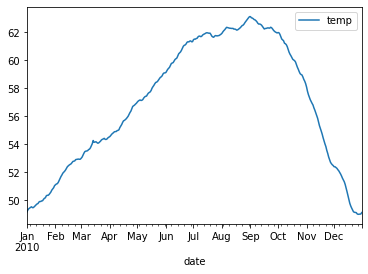

In [11]:
# plot
daily_avg.plot()

2) Write the code necessary to visualize the minimum temperature over time.

In [12]:
daily_avg = sf_temps.resample('D').min()
daily_avg.head()

,temp
date,
2010-01-01,45.8
2010-01-02,46.0
2010-01-03,46.1
2010-01-04,46.1
2010-01-05,46.1


<AxesSubplot:xlabel='date'>

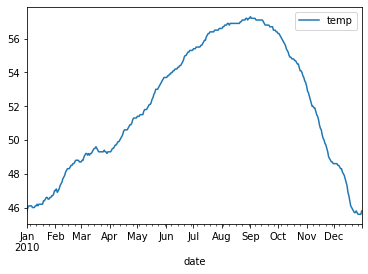

In [13]:
# plot
daily_avg.plot()

3) Write the code necessary to visualize the maximum temperature over time.

<AxesSubplot:xlabel='date'>

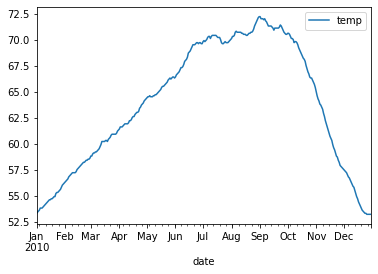

In [14]:
daily_avg = sf_temps.resample('D').max()
daily_avg.plot()

4) Which month is the coldest, on average?

<AxesSubplot:xlabel='date'>

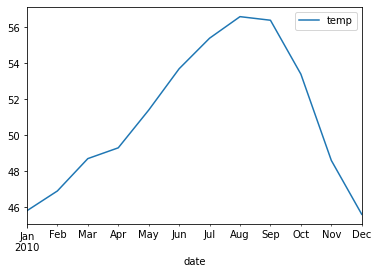

In [15]:
monthly_avg = sf_temps.resample('M').min()
monthly_avg.plot()

In [16]:
monthly_avg = sf_temps.resample('M').mean()

In [17]:
monthly_avg.min()

temp    49.98414
dtype: float64

In [18]:
monthly_avg[monthly_avg == monthly_avg.min()]

,temp
date,
2010-01-31,49.98414
2010-02-28,NaN
2010-03-31,NaN
2010-04-30,NaN
2010-05-31,NaN
2010-06-30,NaN
2010-07-31,NaN
2010-08-31,NaN
2010-09-30,NaN


In [19]:
# January is the coldest month on average

5) Which month has the highest average temperature?

In [20]:
monthly_avg.max()

temp    62.487083
dtype: float64

In [21]:
monthly_avg[monthly_avg == monthly_avg.max()]

,temp
date,
2010-01-31,NaN
2010-02-28,NaN
2010-03-31,NaN
2010-04-30,NaN
2010-05-31,NaN
2010-06-30,NaN
2010-07-31,NaN
2010-08-31,NaN
2010-09-30,62.487083


In [22]:
# September has highest avg temp

6) Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [23]:
daily_mm = sf_temps.temp.resample('D').agg(['min', 'max'])

In [24]:
daily_mm['delta'] = daily_mm['max'] - daily_mm['min']

In [25]:
daily_mm.delta.sort_values()

date
2010-01-02     7.4
2010-01-03     7.4
2010-12-31     7.4
2010-12-26     7.5
2010-12-25     7.5
              ... 
2010-09-03    14.8
2010-08-29    14.8
2010-08-30    14.9
2010-09-01    14.9
2010-08-31    15.0
Name: delta, Length: 365, dtype: float64

In [26]:
# August has highest daily temp variability

# Section 2

In [27]:
from vega_datasets import data
df = data.seattle_weather()

1) Which year and month combination has the highest amount of precipitation?

In [28]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [29]:
vega = df.set_index('date').sort_index()

In [30]:
x = vega.resample('M').sum().precipitation.sort_values(ascending=False)

In [31]:
x.head()

date
2015-12-31    284.5
2014-03-31    240.0
2015-11-30    212.6
2012-11-30    210.5
2012-03-31    183.0
Name: precipitation, dtype: float64

In [32]:
# December 2015 = 284.5

2) Visualize the amount of monthly precipitation over time

<AxesSubplot:xlabel='date'>

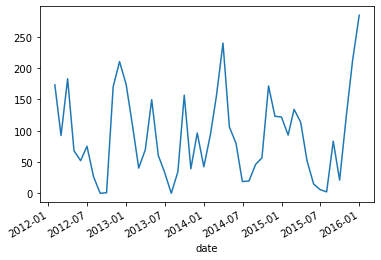

In [33]:
x.plot()

3) Visualize the amount of wind over time. Choose a time interval you think is appropriate.

<AxesSubplot:xlabel='date'>

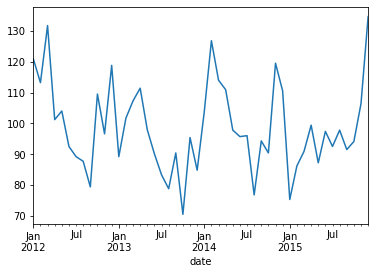

In [34]:
vega.wind.resample('M').sum().plot()

4) Which year-month combination is the windiest?

In [35]:
vega.wind.resample('M').sum().sort_values(ascending=False).head()

date
2015-12-31    134.6
2012-03-31    131.7
2014-02-28    126.8
2012-01-31    120.9
2014-11-30    119.5
Name: wind, dtype: float64

5) What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [36]:
vega.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


In [37]:
vega.weather.unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

In [38]:
vega['sunny'] = vega['weather'] == 'sun'

In [86]:
vega.resample('y').sunny.sum().sort_values(ascending=False)

date
2014-12-31    211
2013-12-31    205
2015-12-31    180
2012-12-31    118
Name: sunny, dtype: int64

In [40]:
# 2014 is sunniest

6) In which month does it rain the most?

In [122]:
vega['month'] = vega.index.month

In [123]:
vega.head()

,precipitation,temp_max,temp_min,wind,weather,sunny,month
date,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,False,1
2012-01-02,10.9,10.6,2.8,4.5,rain,False,1
2012-01-03,0.8,11.7,7.2,2.3,rain,False,1
2012-01-04,20.3,12.2,5.6,4.7,rain,False,1
2012-01-05,1.3,8.9,2.8,6.1,rain,False,1


In [124]:
vega.groupby('month').precipitation.sum().sort_values(ascending=False)

month
11    642.5
12    622.7
3     606.2
10    503.4
1     466.0
2     422.0
4     375.4
9     235.5
5     207.5
8     163.7
6     132.9
7      48.2
Name: precipitation, dtype: float64

In [125]:
# (11) November is the month it rains the most

8) Which month has the most number of days with a non-zero amount of precipitation?

In [145]:
vega['rained'] = vega.precipitation > 0

In [147]:
vega.groupby('month').rained.sum().sort_values(ascending=False)

month
12    81
2     73
3     73
11    71
1     66
10    61
4     59
6     37
9     35
5     34
8     22
7     11
Name: rained, dtype: int64

In [148]:
# December has the most days with non-zero precipitation

In [149]:
# Section 3

In [151]:
flights = data.flights_20k()

In [152]:
flights.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


1) Convert any negative delays to 0.

In [153]:
flights = flights.set_index('date').sort_index()

In [ ]:
flights.where